In [1]:
import pandas as pd
import numpy as np
import os

files = os.listdir('Mobility/dynamische_Verkehrsdaten/Test')

In [2]:
cols = set()
for item in files:
    if '_prep.csv' in item:
        df = pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item))
        if len(cols) == 0:
            cols = set(df.columns)
        else:    
            cols & set(df.columns)
        

In [3]:
cols = list(cols)
cols.remove('Timestamp')
len(cols)

720

In [4]:
df = ()
for item in files:
    if '_prep.csv' in item:
        if len(df) == 0:
            df = pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item))
        else:
            print((pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item), na_values= 0)).shape)
            df = df.append(pd.read_csv('Mobility/dynamische_Verkehrsdaten/Test/{}'.format(item)), 'sort=True')

(47, 721)
(188, 721)
(47, 721)
(47, 721)


/home/jens/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
df.shape
dg = pd.read_csv('Target_And_Wind_Dataframe.csv')
dg = dg.iloc[:376, :]

In [6]:
df.shape

(376, 722)

In [7]:
dg.shape

(376, 13)

In [8]:
dg = pd.concat([dg, df], axis=1, join_axes=[dg.index])

In [9]:
dg.drop('Unnamed: 0', axis =1, inplace=True)
dg.drop('Datum_Zeit', axis =1, inplace=True)
dg.drop('Timestamp', axis =1, inplace=True)
dg.head()

,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Time,Time_rel_cosinus,Time_rel_sinus,Wind_Ost_d,Wind_Ost_v,Wind_Schwan_d,Wind_Schwan_v,Wind_Hochst_d,...,483492747,483492749,483492750,483492751,483492752,483492753,483492754,483492755,483492756,483492758
0,8.9,23.2,30,0.991445,0.130526,2.0,12.0,1.0,15.0,2.1,...,23.0,3.0,11.0,12.0,4.0,3.0,30.0,25.0,9.0,11.0
1,15.2,22.2,60,0.965926,0.258819,1.8,21.0,0.7,19.0,1.8,...,21.0,1.0,7.0,12.0,2.0,7.0,25.0,23.0,6.0,16.0
2,14.9,24.3,90,0.923880,0.382683,2.3,16.0,1.0,14.0,1.9,...,14.0,1.0,5.0,15.0,7.0,11.0,39.0,17.0,11.0,13.0
3,10.8,18.5,120,0.866025,0.500000,2.4,11.0,1.0,11.0,1.9,...,12.0,2.0,6.0,9.0,5.0,10.0,35.0,27.0,10.0,9.0
4,10.6,23.9,150,0.793353,0.608761,1.8,6.0,1.2,18.0,1.8,...,19.0,1.0,23.0,19.0,5.0,9.0,40.0,45.0,12.0,31.0


In [10]:
dg.drop('\t',inplace = True, axis = 1)

In [11]:
dg = dg.fillna(0)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
data_col = list(dg.columns)[3:]
label_col = list(dg.columns)[1:3]

In [14]:
train_data, test_data, train_label, test_label = train_test_split(dg[data_col], dg[label_col])

In [93]:
RFR = RandomForestRegressor()
RFR.fit(train_data, train_label)
print('RMSE on training: {}'.format(np.sqrt(mean_squared_error(RFR.predict(train_data), train_label))))

RMSE on training: 7.530863010682436


In [94]:
print('RMSE on training: {}'.format(np.sqrt(mean_squared_error(RFR.predict(test_data), test_label))))

RMSE on training: 15.372183012885314


In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RFR, random_state=1).fit(test_data, test_label)

# uncomment the following line to visualize your results

In [18]:
eli5.show_weights(perm, feature_names = test_data.columns.tolist())

Weight,Feature
1.8913 ± 0.6837,Time_rel_sinus
0.2448 ± 0.0753,Time_rel_cosinus
0.0021 ± 0.0010,15430010
0.0020 ± 0.0014,15422004
0.0017 ± 0.0003,15429015
0.0016 ± 0.0007,17370029
0.0014 ± 0.0002,15430072
0.0013 ± 0.0004,15442006
0.0011 ± 0.0005,17394001
0.0005 ± 0.0002,15430015


# Big Forest little Tree

In [155]:
la = pd.read_csv('Lat_Lon.csv')
la.head()

,ElemUID,Lat,Lon
0,15424002,50.114246,8.651046
1,17790006,50.096250,8.659665
2,17392004,50.084656,8.632699
3,18301005,50.125027,8.675284
4,18297002,50.119923,8.677420


In [151]:
import itertools
latSensor = [50.12565556, 50.10290556, 50.12691389]
lonSensor = [8.69305556, 8.54222222, 8.74861111]
a = [list(itertools.product(latSensor, lonSensor))[0]]
a.append(list(itertools.product(latSensor, lonSensor))[4])
a.append(list(itertools.product(latSensor, lonSensor))[-1])
# Friedberger, Hochst, Ost
a

[(50.12565556, 8.69305556),
 (50.10290556, 8.54222222),
 (50.12691389, 8.74861111)]

In [152]:
# https://en.wikipedia.org/wiki/Haversine_formula
def distFrom(lat1, lng1, lat2, lng2):
    earthRadius = 6371000 #meters
    dLat = np.radians(lat2-lat1)
    dLng = np.radians(lng2-lng1)
    a = np.sin(dLat/2) ** 2 + np.cos(np.radians(lat1)) * np.cos(
        np.radians(lat2)) * np.sin(dLng/2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    dist = earthRadius * c    
    return dist

def compute_dist_to_Sensor(point, sensor_lat, sensor_lon):
    dfLocation = pd.read_csv('Mobility/dfLocation.csv', sep="\t", index_col='ElemUID')
    return distFrom(dfLocation.loc[point].Lat, dfLocation.loc[point].Lon
                    , sensor_lat, sensor_lon)

In [157]:
a[0]

(50.12565556, 8.69305556)

In [191]:
la['Distance_Fried'] = distFrom(la.Lat, la.Lon, a[0][0], a[0][1])

In [208]:
pff = la.loc[la.Distance_Fried > 2000, 'ElemUID']
pff = [str(item) for item in pff]

In [209]:
dg = pd.read_csv('Mobility/Data_prep3.csv', delimiter='\t')
print(len(dg.columns))
dg.drop('Unnamed: 0', inplace = True, axis = True)
dg.drop(pff, inplace = True, axis = 1)
dg.head()
dg.fillna(0, inplace= True)
print(len(dg.columns))

731
253


In [210]:
col = list(dg.columns)
col = [item for item in col if 'Stickstoff' in item]

In [211]:
data_col = list(dg.columns)
data_col.remove('Timestamp')
data_col.remove(col[0])
data_col.remove(col[1])
label_col = col
dg.drop(dg[dg[label_col[0]]>100].index, axis = 0, inplace=True)

In [212]:
label_col

['Stickstoffmonoxid (NO)[µg/m³]', 'Stickstoffdioxid (NO2)[µg/m³]']

In [213]:
train_data, test_data, train_label, test_label = train_test_split(dg[data_col], dg[label_col[0]], test_size = 0.2)

In [214]:
RFR = RandomForestRegressor(n_estimators = 10)
RFR.fit(train_data, train_label)
print('RMSE on training: {}'.format(np.sqrt(mean_squared_error(RFR.predict(train_data), train_label))))

RMSE on training: 5.9479682580140505


In [215]:
print('RMSE on test: {}'.format(np.sqrt(mean_squared_error(RFR.predict(test_data), test_label))))
print('Quota of smaller guesses: {}'.format((RFR.predict(test_data)/test_label <1).sum()/test_data.shape[0]))

RMSE on test: 14.74194959528157
Quota of smaller guesses: 0.4603550295857988


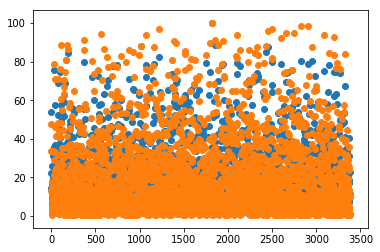

In [200]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(0,train_data.shape[0]),RFR.predict(train_data))
plt.scatter(np.arange(0,train_data.shape[0]),train_label)
plt.show()

In [201]:
RFR.predict(np.array([np.zeros(len(train_data.columns))]))

array([ 25.73])

Baseline for zero entries.

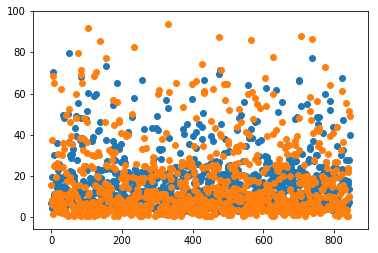

In [187]:
plt.scatter(np.arange(0,test_data.shape[0]),RFR.predict(test_data))
plt.scatter(np.arange(0,test_data.shape[0]),test_label)
plt.show()

In [188]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RFR, random_state=1).fit(test_data, test_label)

# uncomment the following line to visualize your results

In [189]:
eli5.show_weights(perm, feature_names = test_data.columns.tolist())

Weight,Feature
0.1378 ± 0.0216,18361004
0.1072 ± 0.0293,18948001
0.0766 ± 0.0301,18365018
0.0471 ± 0.0064,18967005
0.0357 ± 0.0143,18299006
0.0258 ± 0.0098,18384001
0.0175 ± 0.0027,483492713
0.0172 ± 0.0104,19002003
0.0150 ± 0.0124,18887020
0.0143 ± 0.0072,18372010


In [99]:
better=['17394003','18948001','17404002','17388002','Wind_Hochst_d','18365022'] 
RFR_maybe = RandomForestRegressor(n_estimators = 10)
RFR_maybe.fit(train_data[better], train_label)
print('RMSE on training: {}'.format(np.sqrt(mean_squared_error(RFR_maybe.predict(train_data[better]), train_label))))

RMSE on training: 7.808286152702592


In [100]:
print('RMSE on test: {}'.format(np.sqrt(mean_squared_error(RFR_maybe.predict(test_data[better]), test_label))))

RMSE on test: 17.58049721938287


# Kernel methods

In [55]:
from sklearn.kernel_ridge import KernelRidge

In [56]:
KRe = KernelRidge(kernel = 'rbf')

In [61]:
KRe.fit(train_data,train_label)
print('RMSE on training: {}'.format(mean_squared_error(KRe.predict(train_data), train_label)))
print('RMSE on test: {}'.format(mean_squared_error(KRe.predict(test_data), test_label)))

RMSE on training: 278.91808117514023
RMSE on test: 1046.4814576033637
